In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [2]:
forestfire=pd.read_csv("forestfires.csv")
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forestfire.shape

(517, 31)

In [4]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forestfire[forestfire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
forestfire1= forestfire.drop_duplicates()

In [7]:
forestfire1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
forestfire2=forestfire1.drop(forestfire1.columns[11:30],axis=1)

In [9]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [10]:
forestfire2["month"]=label.fit_transform(forestfire2["month"])
forestfire2["day"]=label.fit_transform(forestfire2["day"])
forestfire2["size_category"]=label.fit_transform(forestfire2["size_category"])

In [11]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


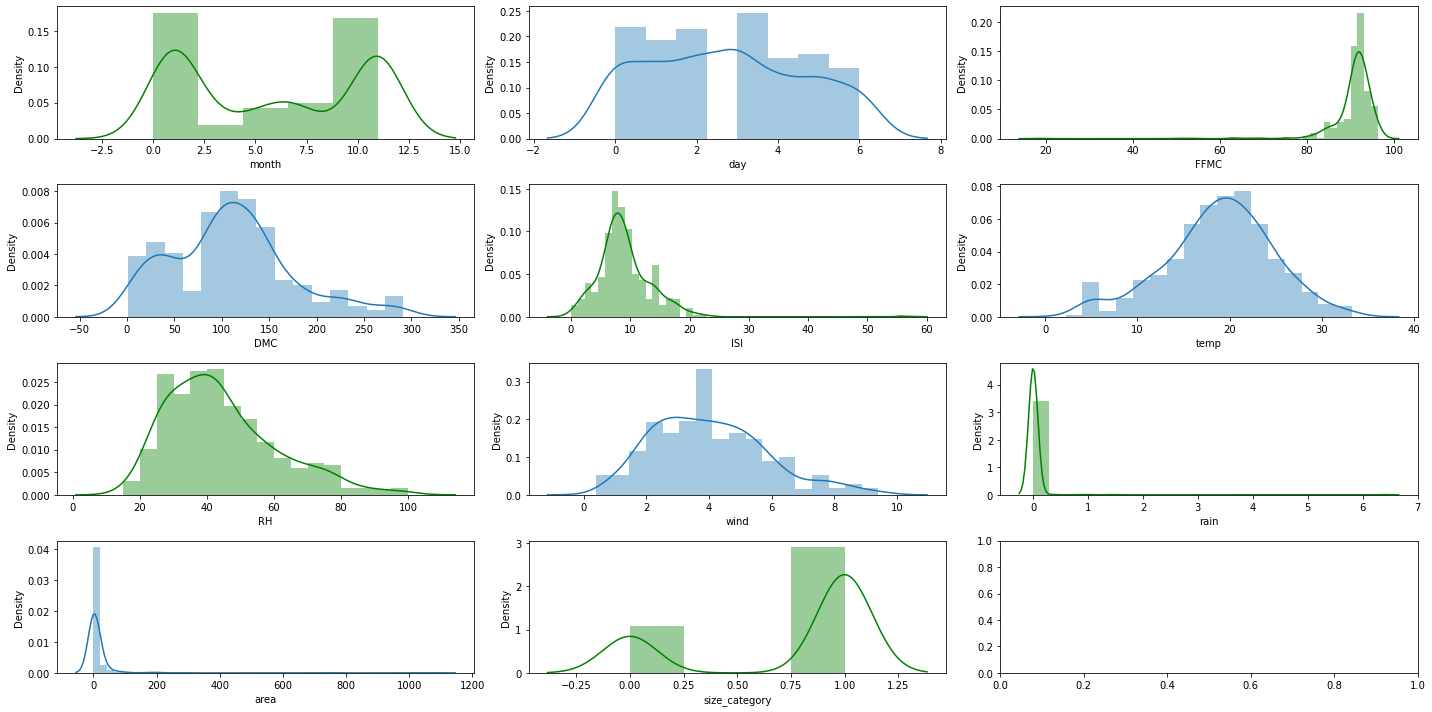

In [12]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.distplot(forestfire2.month,ax=ax[0,0],color='g')
sns.distplot(forestfire2.day,ax=ax[0,1])
sns.distplot(forestfire2.FFMC,ax=ax[0,2],color='g')
sns.distplot(forestfire2.DMC,ax=ax[1,0])
sns.distplot(forestfire2.ISI,ax=ax[1,1],color='g')
sns.distplot(forestfire2.temp,ax=ax[1,2])
sns.distplot(forestfire2.RH,ax=ax[2,0],color='g')
sns.distplot(forestfire2.wind,ax=ax[2,1])
sns.distplot(forestfire2.rain,ax=ax[2,2],color='g')
sns.distplot(forestfire2.area,ax=ax[3,0])
sns.distplot(forestfire2.size_category,ax=ax[3,1],color='g')

plt.tight_layout()

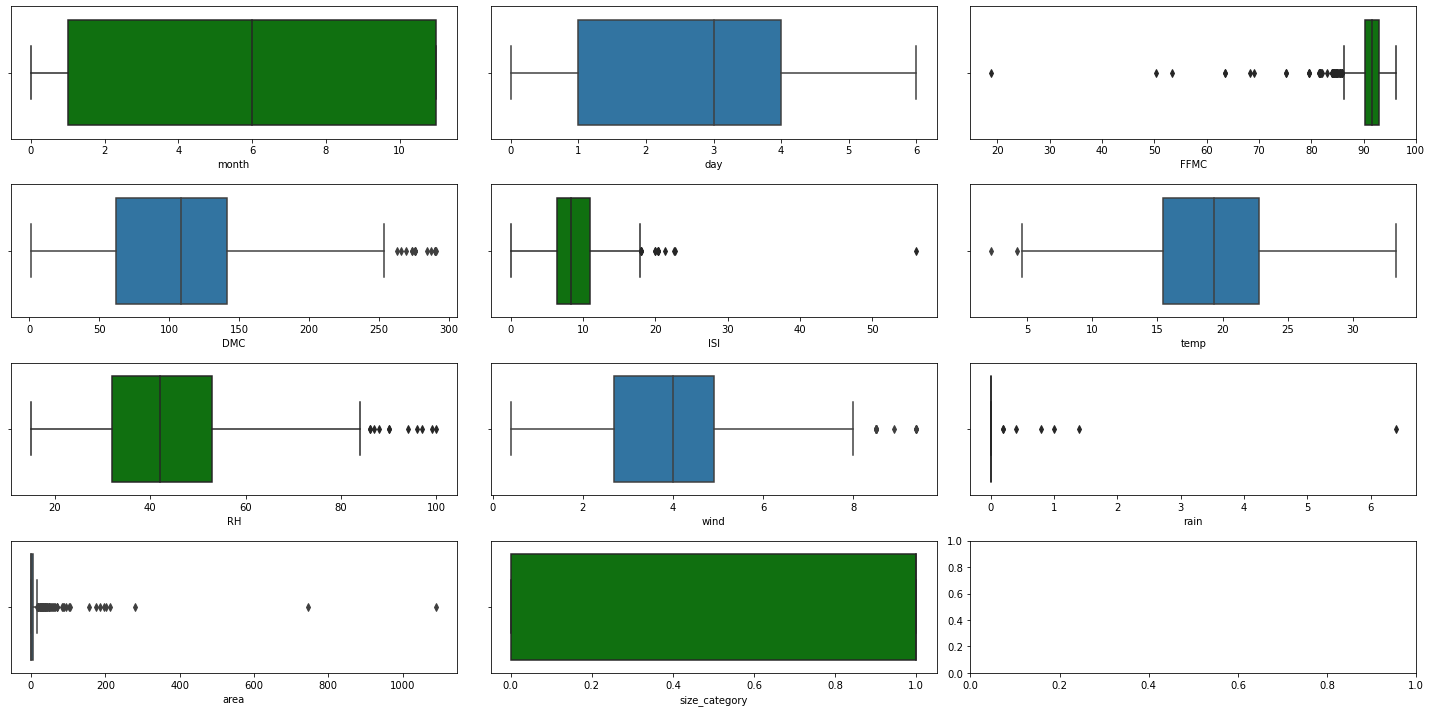

In [13]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.boxplot(forestfire2.month,ax=ax[0,0],color='g')
sns.boxplot(forestfire2.day,ax=ax[0,1])
sns.boxplot(forestfire2.FFMC,ax=ax[0,2],color='g')
sns.boxplot(forestfire2.DMC,ax=ax[1,0])
sns.boxplot(forestfire2.ISI,ax=ax[1,1],color='g')
sns.boxplot(forestfire2.temp,ax=ax[1,2])
sns.boxplot(forestfire2.RH,ax=ax[2,0],color='g')
sns.boxplot(forestfire2.wind,ax=ax[2,1])
sns.boxplot(forestfire2.rain,ax=ax[2,2],color='g')
sns.boxplot(forestfire2.area,ax=ax[3,0])
sns.boxplot(forestfire2.size_category,ax=ax[3,1],color='g')

plt.tight_layout()

In [14]:
x= forestfire2.iloc[:,:11]
y= forestfire2.iloc[:,-1]

In [15]:
model1 = Sequential()
model1.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model1.add(Dense(8,kernel_initializer='random_normal',activation='linear'))
model1.add(Dense(1,kernel_initializer='random_normal',activation='sigmoid'))

In [16]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model1.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 2s 11ms/step - loss: 0.6479 - accuracy: 0.6510 - val_loss: 0.6345 - val_accuracy: 0.6726
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7595 - val_loss: 0.6570 - val_accuracy: 0.6786
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7595 - val_loss: 0.6624 - val_accuracy: 0.6845
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.7771 - val_loss: 0.6927 - val_accuracy: 0.7024
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.7947 - val_loss: 0.6991 - val_accuracy: 0.7202
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.8123 - val_loss: 0.5476 - val_accuracy: 0.7619
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8446 - val_loss: 0.5353 - val_accuracy: 0.7798
Epoch 8/150


Epoch 59/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 0.0803 - val_accuracy: 0.9583
Epoch 60/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9912 - val_loss: 0.0856 - val_accuracy: 0.9583
Epoch 61/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9853 - val_loss: 0.0805 - val_accuracy: 0.9643
Epoch 62/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9824 - val_loss: 0.3612 - val_accuracy: 0.9107
Epoch 63/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0745 - accuracy: 0.9707 - val_loss: 0.2394 - val_accuracy: 0.9286
Epoch 64/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9795 - val_loss: 0.0868 - val_accuracy: 0.9524
Epoch 65/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9524
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9824 - val_loss: 0.4838 - val_accuracy: 0.9048
Epoch 117/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 0.9765 - val_loss: 0.2013 - val_accuracy: 0.9226
Epoch 118/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9912 - val_loss: 0.1173 - val_accuracy: 0.9583
Epoch 119/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.9702
Epoch 120/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1504 - val_accuracy: 0.9464
Epoch 121/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1083 - val_accuracy: 0.9643
Epoch 122/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.3058 - val_accuracy: 0.9345
Epoch 123/150

In [18]:
score = model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9862
accuracy: 98.62%


In [19]:
history = model1.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1067 - val_accuracy: 0.9702
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1147 - val_accuracy: 0.9643
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.9583
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1206 - val_accuracy: 0.9583
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1280 - val_accuracy: 0.9524
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1142 - val_accuracy: 0.9643
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9643
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 0.9583
Epoch 60/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1387 - val_accuracy: 0.9643
Epoch 61/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1476 - val_accuracy: 0.9524
Epoch 62/150
35/35 [==============================] - 0s 3ms/step - loss: 7.9490e-04 - accuracy: 1.0000 - val_loss: 0.1445 - val_accuracy: 0.9583
Epoch 63/150
35/35 [==============================] - 0s 3ms/step - loss: 8.1088e-04 - accuracy: 1.0000 - val_loss: 0.1396 - val_accuracy: 0.9583
Epoch 64/150
35/35 [==============================] - 0s 3ms/step - loss: 9.3765e-04 - accuracy: 1.0000 - val_loss: 0.1477 - val_accuracy: 0.9583
Epoch 65/150
35/35 [==============================] - 0s 3ms/step - loss: 8.0357e-04 - accuracy: 1.0000 - val_loss: 0.1411 - val_accurac

35/35 [==============================] - 0s 2ms/step - loss: 2.7199e-04 - accuracy: 1.0000 - val_loss: 0.2039 - val_accuracy: 0.9464
Epoch 116/150
35/35 [==============================] - 0s 2ms/step - loss: 3.4741e-04 - accuracy: 1.0000 - val_loss: 0.1908 - val_accuracy: 0.9583
Epoch 117/150
35/35 [==============================] - 0s 2ms/step - loss: 2.6576e-04 - accuracy: 1.0000 - val_loss: 0.2054 - val_accuracy: 0.9464
Epoch 118/150
35/35 [==============================] - 0s 2ms/step - loss: 3.2636e-04 - accuracy: 1.0000 - val_loss: 0.1915 - val_accuracy: 0.9583
Epoch 119/150
35/35 [==============================] - 0s 2ms/step - loss: 2.6791e-04 - accuracy: 1.0000 - val_loss: 0.1942 - val_accuracy: 0.9524
Epoch 120/150
35/35 [==============================] - 0s 2ms/step - loss: 2.4357e-04 - accuracy: 1.0000 - val_loss: 0.1924 - val_accuracy: 0.9583
Epoch 121/150
35/35 [==============================] - 0s 2ms/step - loss: 2.2455e-04 - accuracy: 1.0000 - val_loss: 0.2116 - val_ac

In [20]:
model1.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

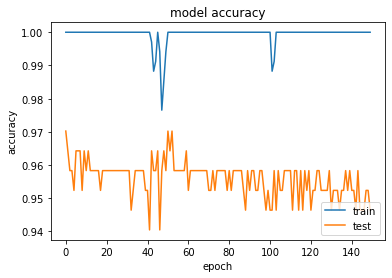

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

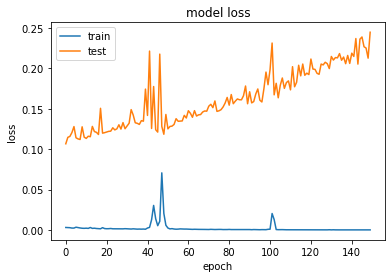

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()